In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
import os
import cv2

In [ ]:
image_folder = "C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits"  
images = []

In [18]:
for label in range(10):  
    digit_folder = os.path.join(image_folder, str(label))
    for img_name in os.listdir(digit_folder):
        img_path = os.path.join(digit_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))  
        images.append(img)
        labels.append(label)

In [19]:
X = np.array(images) / 255.0  
y = np.array(labels)

In [20]:
X = X.reshape(-1, 28 * 28)  
ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
digit_model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(10, activation='softmax')
])

c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
digit_model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
digit_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)
_, acc = digit_model.evaluate(X_test, y_test)
print(f"Digit Recognition Accuracy: {acc*100:.2f}%")


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5683 - loss: 1.4786 - val_accuracy: 0.8962 - val_loss: 0.4486
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8937 - loss: 0.4301 - val_accuracy: 0.9218 - val_loss: 0.3204
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9210 - loss: 0.2970 - val_accuracy: 0.9385 - val_loss: 0.2569
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.2646 - val_accuracy: 0.9311 - val_loss: 0.2295
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9357 - loss: 0.2254 - val_accuracy: 0.9355 - val_loss: 0.2102
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9402 - loss: 0.2072 - val_accuracy: 0.9473 - val_loss: 0.1921
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9497 - loss: 0.1746 - val_accuracy: 0.9434 - val_loss: 0.1888
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9494 - loss: 0.1749 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


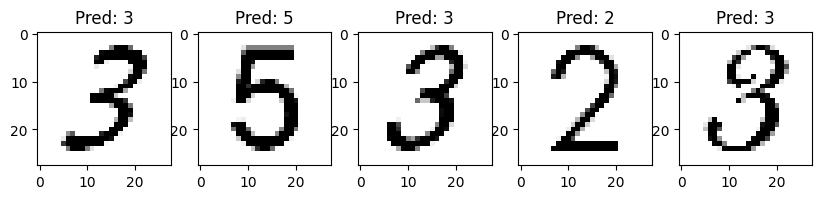

In [24]:
predictions = digit_model.predict(X_test[:5]).argmax(axis=1)
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predictions[i]}')
plt.show()